# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
BoomBikes is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —


- To identify the variables that are significant in predicting the demand for shared bikes.

- To know the accuracy of the model, i.e. how well these variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import the libraries and read the housing dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the file
bsharing = pd.read_csv('day.csv')

In [3]:
# first 5 rows of the data set
bsharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# shape of the data set
bsharing.shape

(730, 16)

In [5]:
# information of the data set
bsharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# mathematical computation of the columns in the data set
bsharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Drop the unnecessary columns

- We must drop unnecessary columns so as to remove the superflous data

In [7]:
# dropping the columns

bsharing.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [8]:
bsharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

- we will check if there is high multicollinearity between variables
- we will check the trend between predictor variable and target variable

We'll visualise our data using `matplotlib` and `seaborn`.

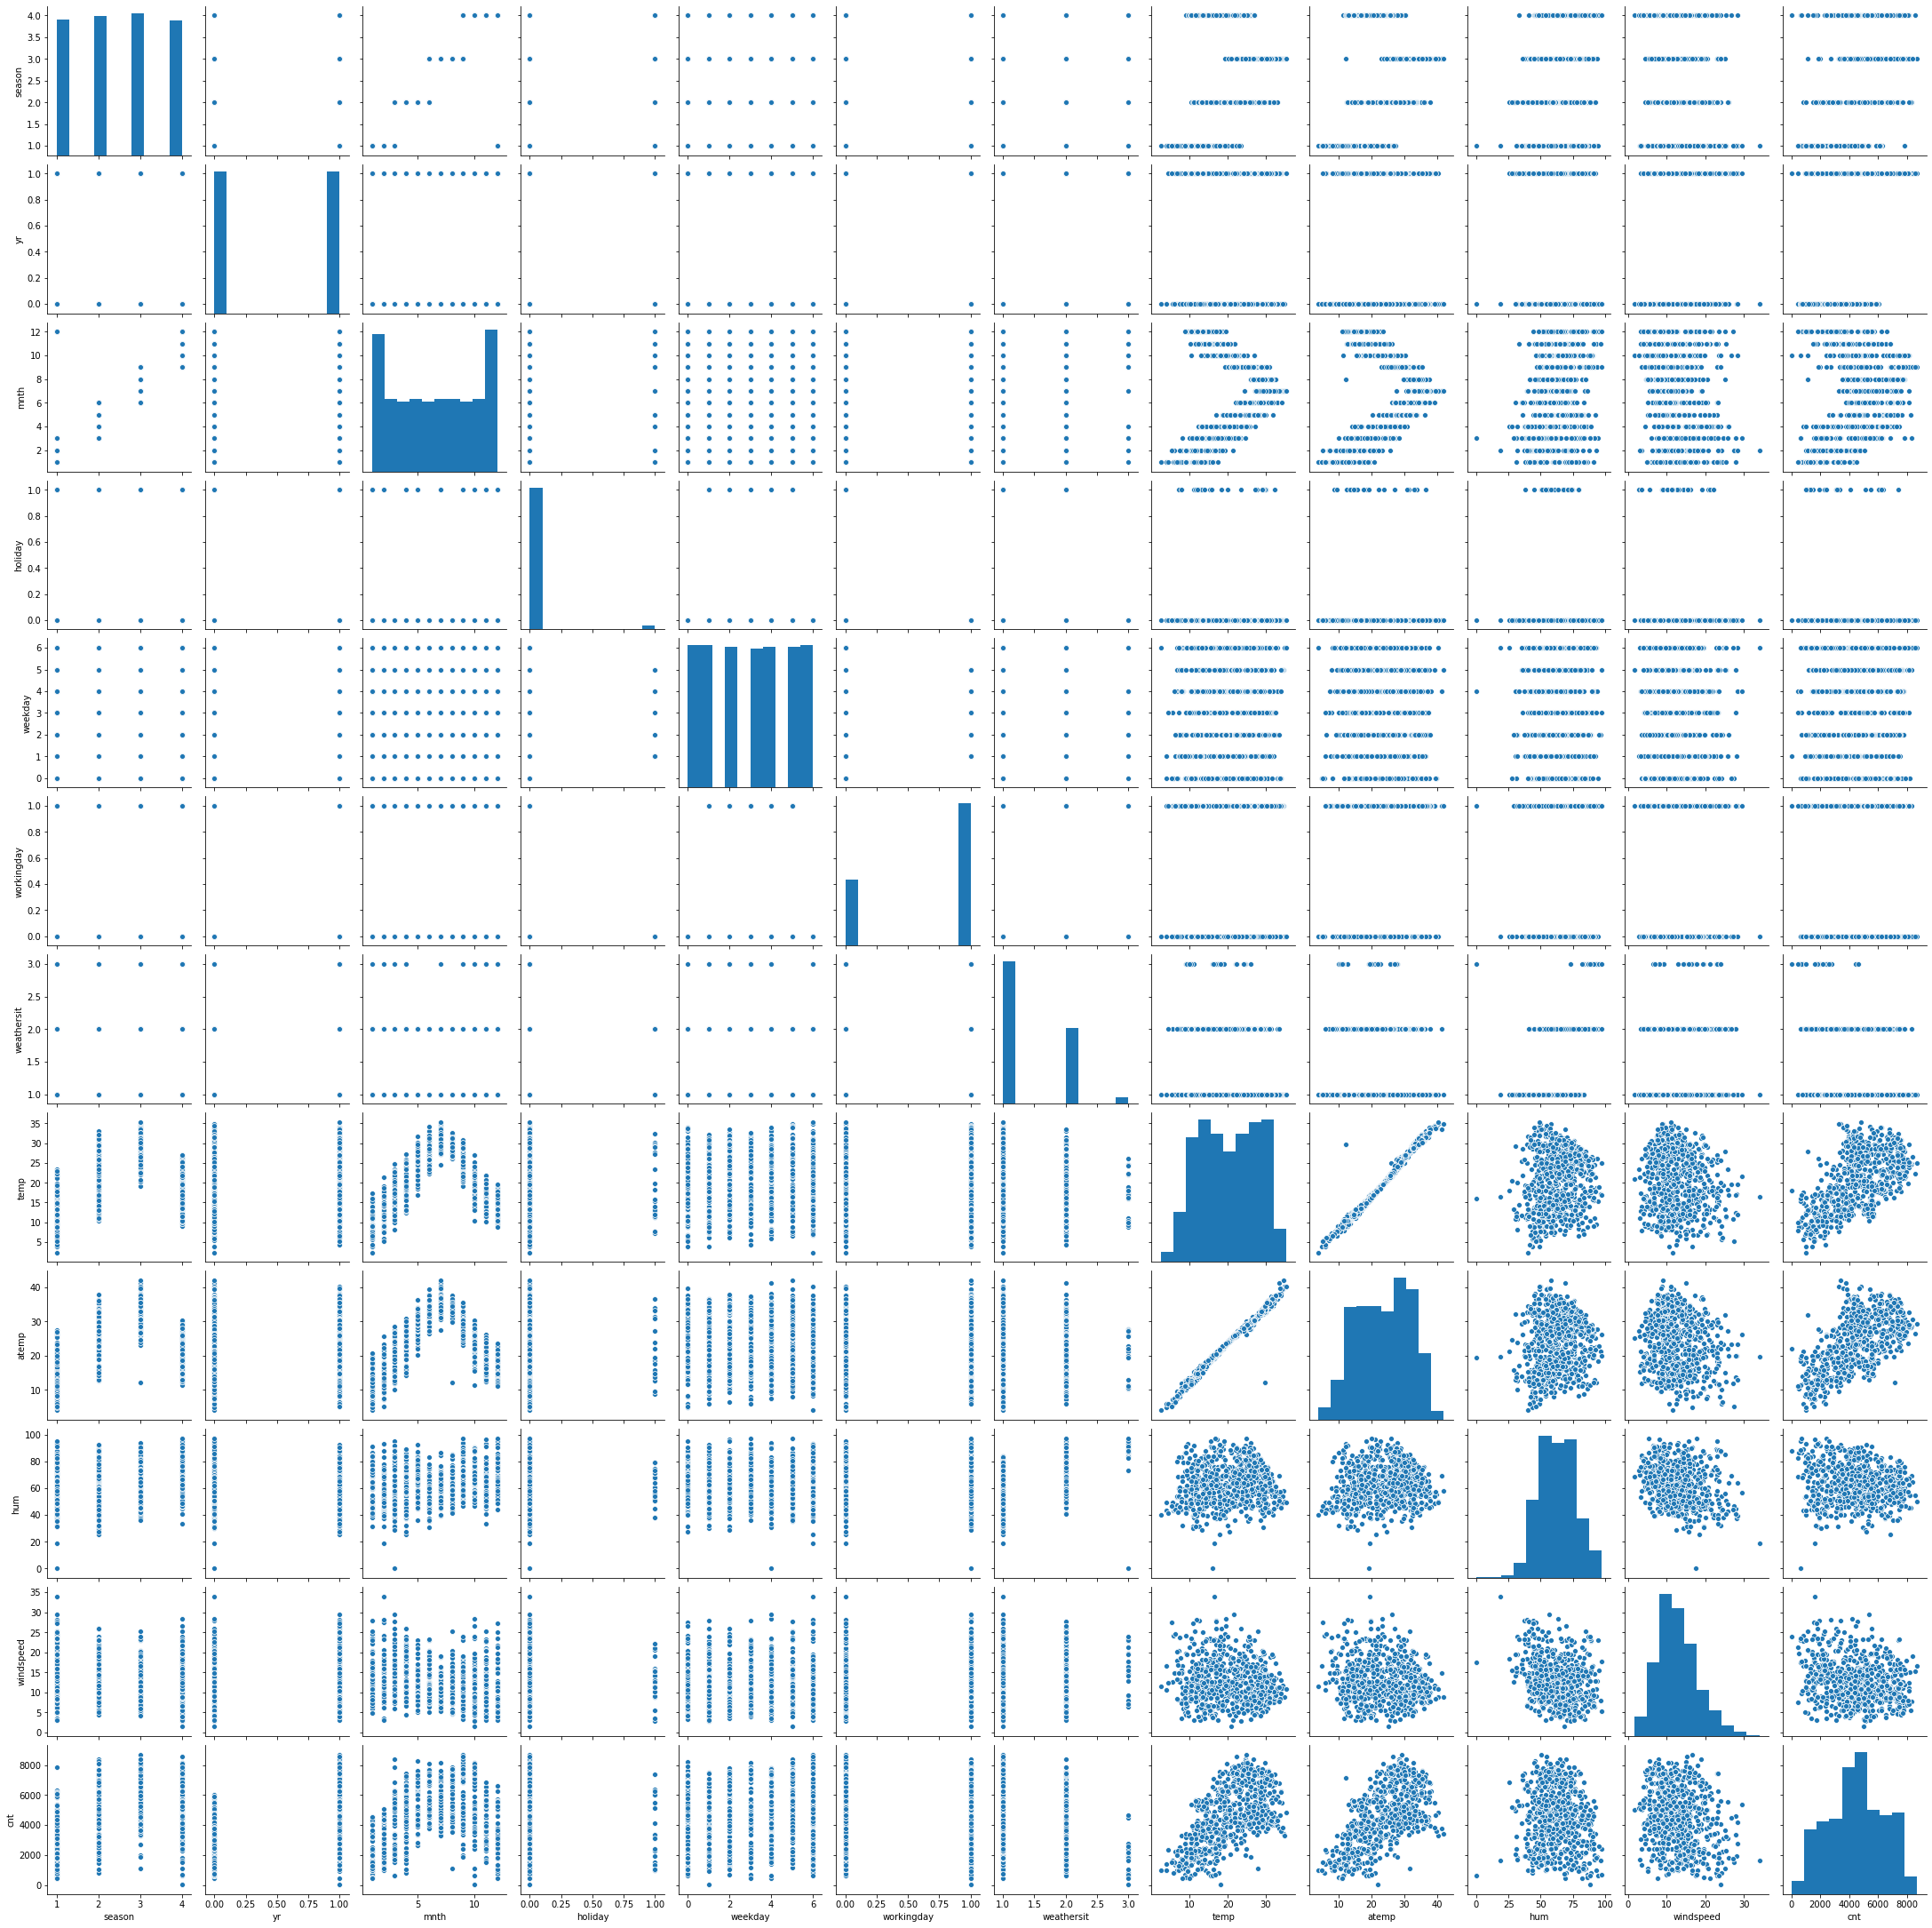

In [9]:
# creating pairplot for the entire data set
sns.pairplot(bsharing)
plt.show()

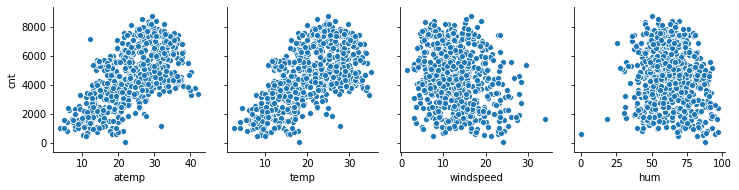

In [10]:
# creating a pairplot for continuos variables vs cnt
sns.pairplot(x_vars=['atemp','temp','windspeed','hum'], y_vars ='cnt', data = bsharing)
plt.show()

- atemp and temp looks to be highly correlated, further as their value increases the value of cnt increases

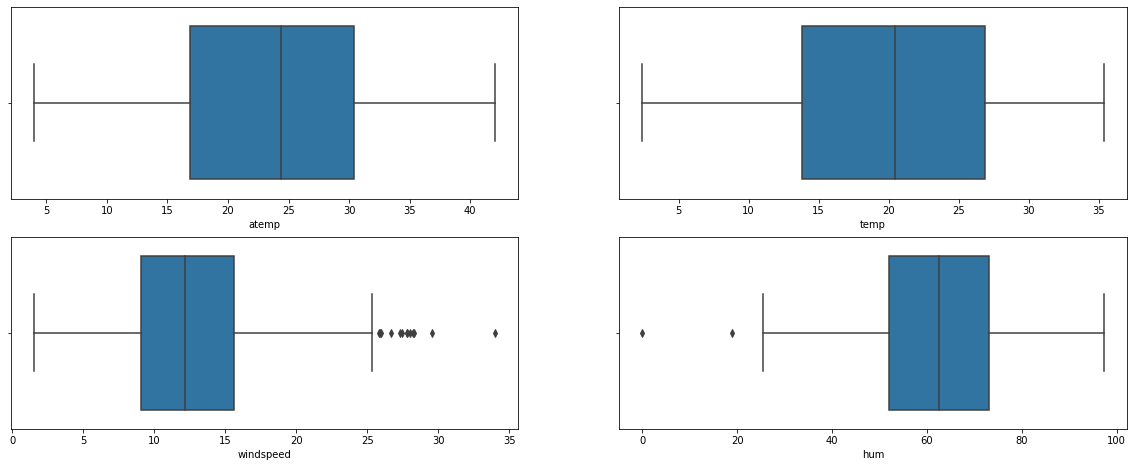

In [11]:
# creating a boxplot for the continuous variables
plt.figure(figsize=(20,12))
plt.subplot(3,2,1)
sns.boxplot(bsharing.atemp)

plt.subplot(3,2,2)
sns.boxplot(bsharing.temp)

plt.subplot(3,2,3)
sns.boxplot(bsharing.windspeed)

plt.subplot(3,2,4)
sns.boxplot(bsharing.hum)
plt.show()

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables, however first let us rename their values for better understanding

In [12]:

# function to change season column
def season(x):
    if x is 1:
        return 'spring'
    elif x is 2:
        return 'summer'
    elif x is 3:
        return 'fall'
    else:
        return 'winter'

# function to change yr column
def mnth(x):
    if x is 1:
        return 'Jan'
    elif x is 2:
        return 'Feb'
    elif x is 3:
        return 'Mar'
    elif x is 4:
        return 'April'
    elif x is 5:
        return 'May'
    elif x is 6:
        return 'June'
    elif x is 7:
        return 'July'
    elif x is 8:
        return 'Aug'
    elif x is 9:
        return 'Sept'
    elif x is 10:
        return 'Oct'
    elif x is 11:
        return 'Nov'
    else:
        return 'Dec'

# function to change weekday
def weekday(x):
    if x is 0:
        return 'Sun'
    elif x is 1:
        return 'Mon'
    elif x is 2:
        return 'Tue'
    elif x is 3:
        return 'Wed'
    elif x is 4:
        return 'Thur'
    elif x is 5:
        return 'Fri'
    elif x is 6:
        return 'Sat'
        

# function to change weathersit
def weathersit(x):
    if x is 1:
        return 'Clear'
    elif x is 2:
        return 'Misty-Cloudy'
    else:
        return 'Light Snow Rain'

In [13]:
# Application of the renaming functions on the categorical variables

bsharing['season'] = bsharing['season'].apply(season)

bsharing['mnth'] = bsharing['mnth'].apply(mnth)

bsharing['weekday'] = bsharing['weekday'].apply(weekday)

bsharing['weathersit'] = bsharing['weathersit'].apply(weathersit)

In [14]:
# Checking value counts of season
bsharing['season'].value_counts(normalize = True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

In [15]:
# Checking value counts of mnth
bsharing['mnth'].value_counts(normalize = True)

Aug      0.084932
Jan      0.084932
Oct      0.084932
Dec      0.084932
May      0.084932
July     0.084932
Mar      0.084932
April    0.082192
Nov      0.082192
Sept     0.082192
June     0.082192
Feb      0.076712
Name: mnth, dtype: float64

In [16]:
# Checking value counts of weekday
bsharing['weekday'].value_counts(normalize =True)

Sun     0.143836
Mon     0.143836
Sat     0.143836
Fri     0.142466
Tue     0.142466
Thur    0.142466
Wed     0.141096
Name: weekday, dtype: float64

In [17]:
# Checking value counts of weathersit
bsharing.weathersit.value_counts(normalize = True)

Clear              0.634247
Misty-Cloudy       0.336986
Light Snow Rain    0.028767
Name: weathersit, dtype: float64

In [18]:
# Checking the head again
bsharing.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Thur,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Fri,1,Misty-Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Sat,0,Misty-Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


**Let us now create boxplot for the categorical variables and do note**
- yr : year (0: 2018, 1:2019)
- holiday : weather day is a holiday or not
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

**For analysis we will not change the values of the above columns**

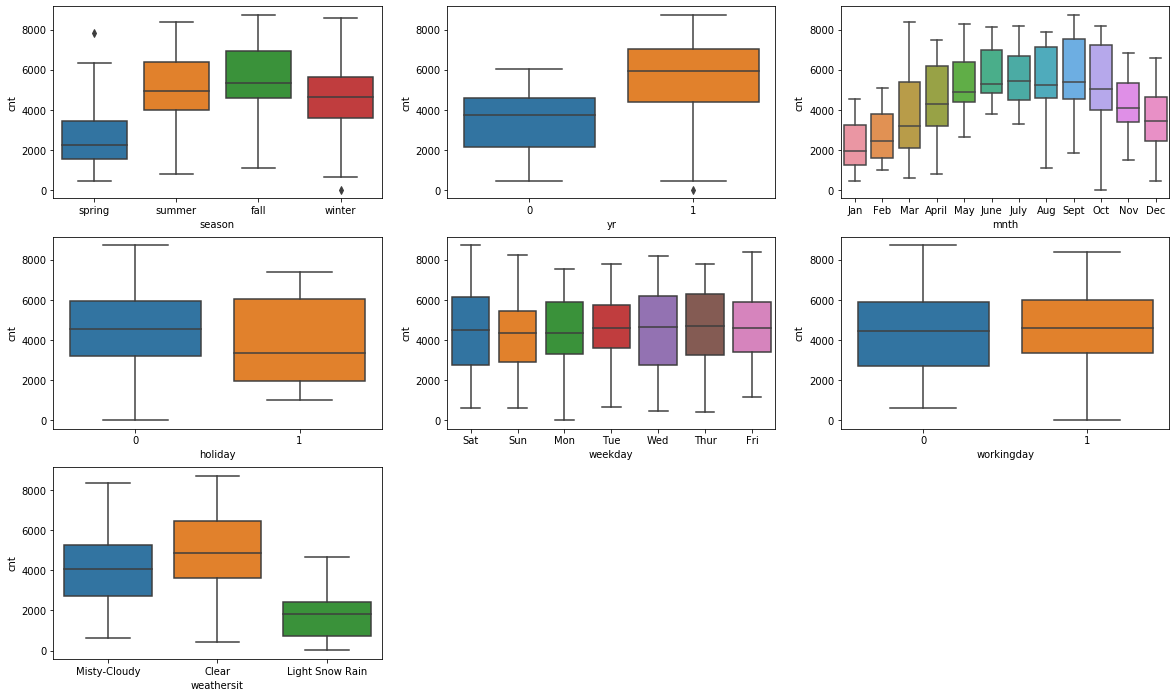

In [19]:
#Boxplots for categorical variables
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data = bsharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y='cnt', data = bsharing)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data = bsharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt',data = bsharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y ='cnt',data = bsharing)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y ='cnt', data = bsharing)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y ='cnt',data = bsharing)
plt.show()

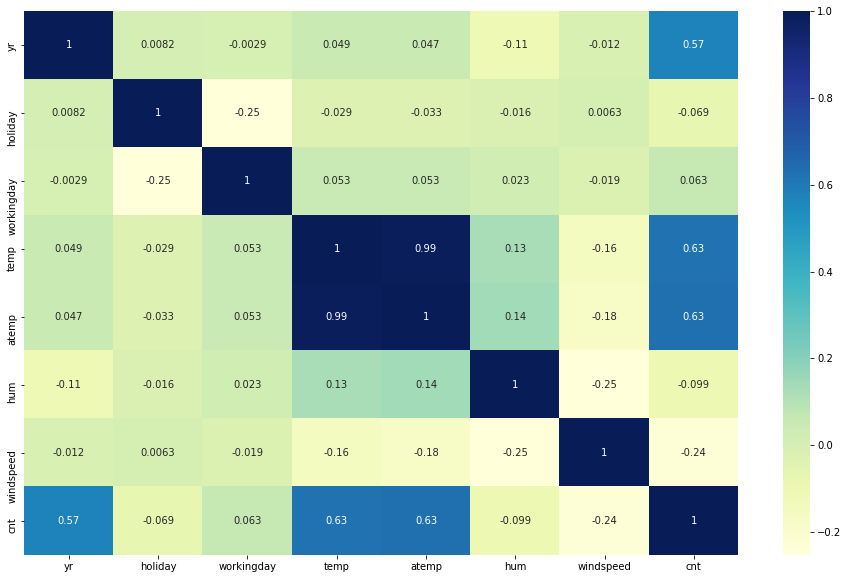

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bsharing.corr(), annot = True, cmap="YlGnBu")
plt.show()

**The correlation between atemp and temp is equal to 1, thus we can drop one of those**

In [21]:
# Dropping atemp

bsharing = bsharing.drop(columns='atemp')

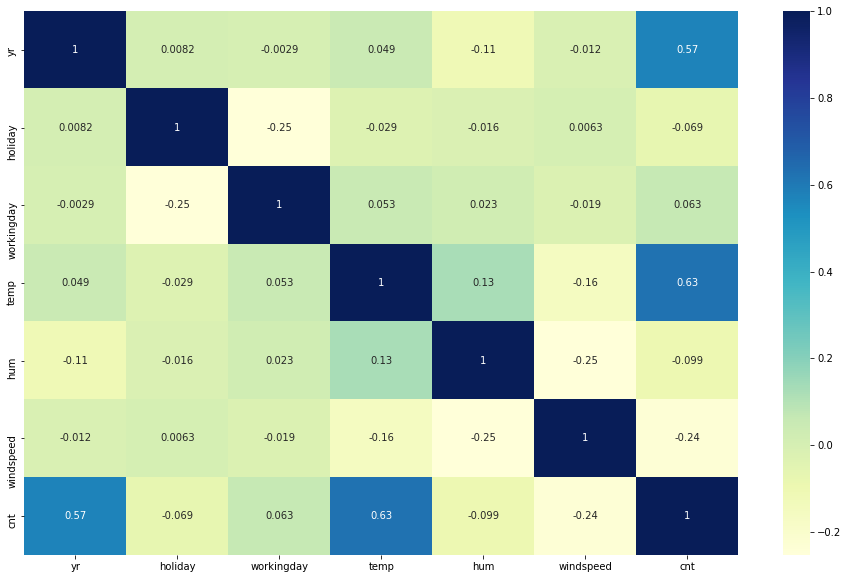

In [22]:
# Let's check again the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bsharing.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [23]:
#Checking the head of the data set
bsharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty-Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty-Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Step 4: Data Preparation

##### Creating dummy variables

We have columns like season, mnth, weekday, weathersit with multiple levels, we must convert them into integer by creating dummy varibles for them

In [24]:
# Get the dummy variables for the feature 'season', 'mnth', 'weekday','weathersit'
season_temp = pd.get_dummies(bsharing['season'],drop_first = True)

mnth_temp = pd.get_dummies(bsharing['mnth'],drop_first = True)

weekday_temp = pd.get_dummies(bsharing['weekday'],drop_first = True)

weathersit_temp = pd.get_dummies(bsharing['weathersit'],drop_first = True)

In [25]:
# Checking the head of season_temp
season_temp.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
# Checking the head of mnth_temp
mnth_temp.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [27]:
# Checking the head of weekday_temp
weekday_temp.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [28]:
# Checking the head of weathersit_temp
weathersit_temp.head()

,Light Snow Rain,Misty-Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [29]:
# Ddding dummy variables to the main column
bsharing = pd.concat([bsharing,season_temp,mnth_temp,weekday_temp,weathersit_temp], axis =1)

# Dropping the original columns
bsharing = bsharing.drop(columns =['season','mnth','weekday','weathersit'])

In [30]:
# Checking the head of the data set
bsharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow Rain,Misty-Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# checking the information of  the data set
bsharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    uint8  
 8   summer           730 non-null    uint8  
 9   winter           730 non-null    uint8  
 10  Aug              730 non-null    uint8  
 11  Dec              730 non-null    uint8  
 12  Feb              730 non-null    uint8  
 13  Jan              730 non-null    uint8  
 14  July             730 non-null    uint8  
 15  June             730 non-null    uint8  
 16  Mar              730 non-null    uint8  
 17  May             

## Step 5: Splitting the Data into Training and Testing Sets

To begin with aggression we must begin with split

In [32]:
# Import the libraries
from sklearn.model_selection import train_test_split

In [33]:
# Perform the split

df_train,df_test = train_test_split(bsharing, train_size = 0.7, test_size = 0.3, random_state=120)

### Rescaling the Features 

If you see the data set you will find that 'atemp','hum','windspeed' have huge value when compared with other columns, thus it is extremely important to rescale the variables so that they have a comparable scale
This time, we will use MinMax scaling.

#### Performing Scaling on the Train data set

In [34]:
# Importing the library to perform min-max scaling
from sklearn.preprocessing import MinMaxScaler

# Creating an object with the column names which needs to be scaled
scale_temp = ['temp','hum','windspeed','cnt']

# Performing the scaling
scaler = MinMaxScaler()

df_train[scale_temp] = scaler.fit_transform(df_train[scale_temp])

In [35]:
# checking the head of the train data set
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow Rain,Misty-Cloudy
557,1,0,1,0.818284,0.550216,0.296736,0.870034,0,0,0,...,0,0,0,0,0,1,0,0,0,0
629,1,0,0,0.736253,0.671862,0.623114,0.981249,0,0,0,...,0,1,0,1,0,0,0,0,0,0
503,1,0,0,0.673950,0.474026,0.146917,0.969413,0,1,0,...,0,0,0,1,0,0,0,0,0,0
81,0,0,1,0.358646,0.872275,0.505448,0.245986,0,1,0,...,0,0,0,0,0,0,0,1,0,1
709,1,0,1,0.366591,0.619914,0.652825,0.642095,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [36]:
# checking mathematical summary of the train data set
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow Rain,Misty-Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.490196,0.027451,0.692157,0.539748,0.650909,0.397182,0.520849,0.247059,0.24902,0.24902,...,0.084314,0.076471,0.152941,0.162745,0.117647,0.145098,0.141176,0.149020,0.029412,0.339216
std,0.500395,0.163554,0.462054,0.230394,0.147648,0.185127,0.227048,0.431725,0.43287,0.43287,...,0.278131,0.266010,0.360284,0.369495,0.322506,0.352545,0.348545,0.356457,0.169124,0.473908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.540801,0.259632,0.366167,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545191,0.650649,0.370175,0.528302,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.754654,0.502957,0.674147,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


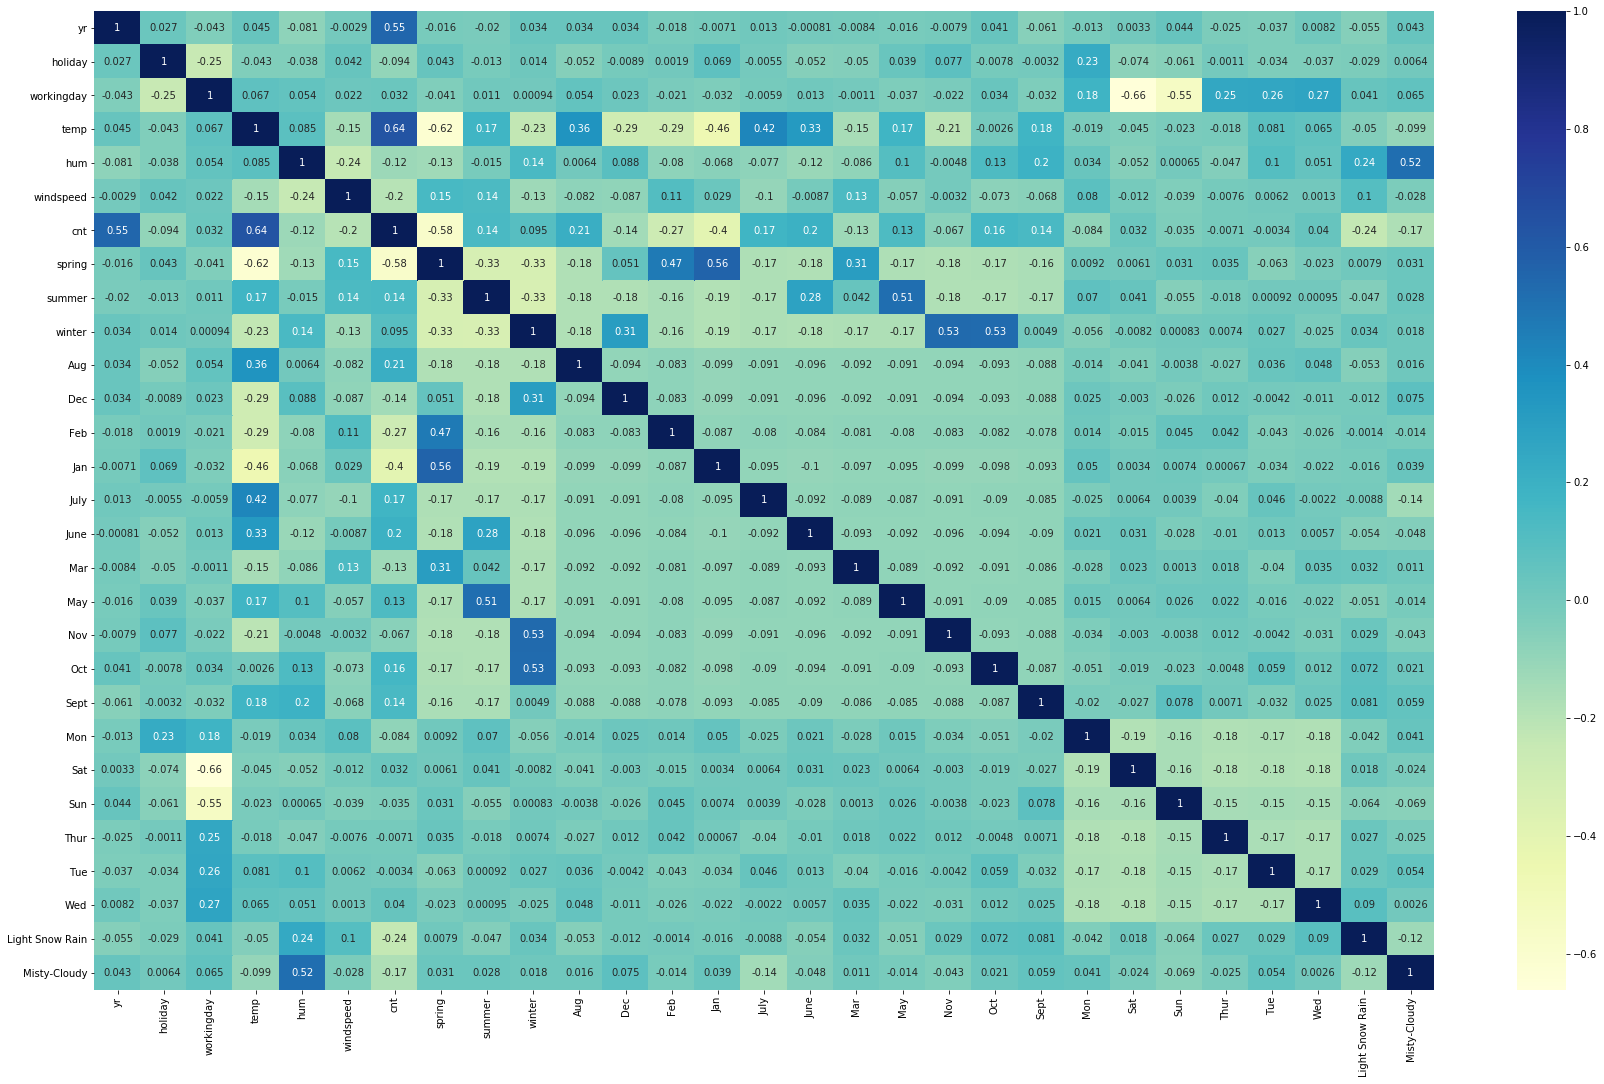

In [37]:
# creating a correlation matrix for train dataset

plt.figure(figsize=(30,18))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In the above heatmap, temp looks to be most correlated to the cnt, let us draw a scatterplot between them

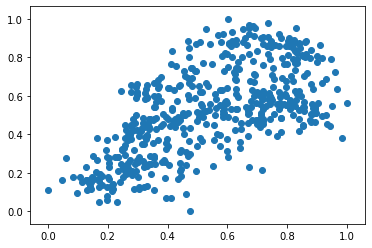

In [38]:
plt.figure()
plt.scatter(x=df_train.temp,y = df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [39]:
# taking out the target variable and putting it in y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
# head of y_train
y_train.head()

557    0.870034
629    0.981249
503    0.969413
81     0.245986
709    0.642095
Name: cnt, dtype: float64

In [41]:
# head of X_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow Rain,Misty-Cloudy
557,1,0,1,0.818284,0.550216,0.296736,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
629,1,0,0,0.736253,0.671862,0.623114,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
503,1,0,0,0.673950,0.474026,0.146917,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
81,0,0,1,0.358646,0.872275,0.505448,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
709,1,0,1,0.366591,0.619914,0.652825,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [42]:
# Checking all the columns of the data set
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed',
       'Light Snow Rain', 'Misty-Cloudy'],
      dtype='object')

## Step 6: Building the model

- Mixed method is going to be followed
- 15 best features will be chosen using RFE
- using p value and VIF we will go for further elimination

In [43]:
# Importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Creating the fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Performing RFE
rfe = RFE(lm, 15, step=1) 
rfe = rfe.fit(X_train, y_train)

In [45]:
# printing the importance of the feaure variables along with their importance
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 13),
 ('Jan', False, 4),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 2),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sept', True, 1),
 ('Mon', False, 5),
 ('Sat', True, 1),
 ('Sun', False, 6),
 ('Thur', False, 9),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Snow Rain', True, 1),
 ('Misty-Cloudy', True, 1)]

In [46]:
# useful columns as per RFE and storing it in col
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sept', 'Sat', 'Light Snow Rain',
       'Misty-Cloudy'],
      dtype='object')

In [47]:
# importing library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# creating a function OLS_FIT for future use
def OLS_FIT(y,X):
    X_train_sm=sm.add_constant(X)
    f_model = sm.OLS(y,X_train_sm).fit()
    print(f_model.summary())
    return f_model

# creating a function VIF_Model
def VIF_MODEL(X) : 
    temp_df = sm.add_constant(X)
    vif = [variance_inflation_factor(temp_df.values,i) for i in range(temp_df.shape[1])]
    vif_frame = pd.DataFrame({'VIF' : vif[0:]},index = temp_df.columns).reset_index()
    print(vif_frame.sort_values(by='VIF',ascending=False))

# creating a object with const for furture use
d = 'const'

### Building the model using Statsmodel, for the detailed statistics

MODEL 1

In [48]:
# Creating X_train_rfe of the X_train columns selected by RFE
X_train_rfe = X_train[col]

In [49]:
# Creating the model using the function created earlier
OLS_FIT(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.63e-189
Time:                        13:54:50   Log-Likelihood:                 509.09
No. Observations:                 510   AIC:                            -986.2
Df Residuals:                     494   BIC:                            -918.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3068      0.035     

### Checking VIF

In [50]:
# using the VIF function created earlier to calculate VIF
VIF_MODEL(X_train_rfe)

              index        VIF
0             const  77.291572
4              temp   3.295942
7            spring   2.738305
8            winter   2.311580
3        workingday   2.193701
13              Sat   2.039467
5               hum   1.969256
11              Nov   1.701800
15     Misty-Cloudy   1.688765
9               Dec   1.388772
10             July   1.303891
14  Light Snow Rain   1.272519
2           holiday   1.216705
6         windspeed   1.179345
12             Sept   1.132062
1                yr   1.042604


In [51]:
# dropping "holiday" for its p value, further it may be decribed by other variables as saturday and workingday
X_train_rfe.drop(columns='holiday', inplace=True)

MODEL 2

In [52]:
# Creating the model using the function created earlier
OLS_FIT(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.92e-189
Time:                        13:54:50   Log-Likelihood:                 506.57
No. Observations:                 510   AIC:                            -983.1
Df Residuals:                     495   BIC:                            -919.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2956      0.035     

In [53]:
# checking the VIF using the function
VIF_MODEL(X_train_rfe)

              index        VIF
0             const  75.694631
3              temp   3.292778
6            spring   2.735482
7            winter   2.311538
4               hum   1.964411
2        workingday   1.838076
12              Sat   1.813446
10              Nov   1.692157
14     Misty-Cloudy   1.682120
8               Dec   1.387891
9              July   1.303887
13  Light Snow Rain   1.271910
5         windspeed   1.177911
11             Sept   1.131801
1                yr   1.042587


In [54]:
# drop Dec for its VIF, further it can be defined by other variables as well
X_train_rfe.drop(columns='Dec', inplace=True)

MODEL 3

In [55]:
# Creating the model using the function created earlier
OLS_FIT(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          7.68e-188
Time:                        13:54:50   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -972.8
Df Residuals:                     496   BIC:                            -913.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2810      0.035     

In [56]:
# checking the VIF using the function
VIF_MODEL(X_train_rfe)

              index        VIF
0             const  74.610579
3              temp   3.076831
6            spring   2.717434
7            winter   2.100522
4               hum   1.955484
2        workingday   1.835555
11              Sat   1.813274
13     Misty-Cloudy   1.681405
9               Nov   1.466236
8              July   1.296215
12  Light Snow Rain   1.269467
5         windspeed   1.173687
10             Sept   1.122888
1                yr   1.040953


In [57]:
# drop spring for its VIF, fruther it can be defined by other variables as well
X_train_rfe.drop(columns='spring', inplace=True)

MODEL 4

In [58]:
# Creating the model using the function created earlier
OLS_FIT(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     188.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.58e-176
Time:                        13:54:50   Log-Likelihood:                 470.28
No. Observations:                 510   AIC:                            -914.6
Df Residuals:                     497   BIC:                            -859.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1436      0.032     

In [59]:
# checking the VIF using the function
VIF_MODEL(X_train_rfe)

              index        VIF
0             const  56.317567
4               hum   1.951797
2        workingday   1.834775
10              Sat   1.807945
12     Misty-Cloudy   1.673357
6            winter   1.540433
3              temp   1.443803
8               Nov   1.441824
7              July   1.286674
11  Light Snow Rain   1.268326
5         windspeed   1.173158
9              Sept   1.119989
1                yr   1.037785


In [60]:
#drop workingday for its VIF value, and it can be described by other variables
X_train_rfe.drop(columns='workingday', inplace=True)

MODEL 5

In [61]:
# Creating the model using the function created earlier
OLS_FIT(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     194.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.27e-172
Time:                        13:54:50   Log-Likelihood:                 458.18
No. Observations:                 510   AIC:                            -892.4
Df Residuals:                     498   BIC:                            -841.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1956      0.031     

In [62]:
# checking the VIF using the function
VIF_MODEL(X_train_rfe)

              index        VIF
0             const  50.303621
3               hum   1.946514
11     Misty-Cloudy   1.656212
5            winter   1.538479
7               Nov   1.439950
2              temp   1.430351
6              July   1.284972
10  Light Snow Rain   1.255369
4         windspeed   1.173139
8              Sept   1.109575
1                yr   1.032454
9               Sat   1.007207


In [63]:
# dropping Nov since it can be defined by other variables
X_train_rfe.drop(columns='Nov', inplace=True)

MODEL 6

In [64]:
# Creating the model using the function created earlier
OLS_FIT(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     210.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.33e-172
Time:                        13:54:50   Log-Likelihood:                 453.95
No. Observations:                 510   AIC:                            -885.9
Df Residuals:                     499   BIC:                            -839.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1905      0.031     

In [65]:
# checking the VIF using the function
VIF_MODEL(X_train_rfe)

              index        VIF
0             const  50.144673
3               hum   1.944215
10     Misty-Cloudy   1.655022
2              temp   1.421949
6              July   1.284175
9   Light Snow Rain   1.255108
4         windspeed   1.170890
5            winter   1.130807
7              Sept   1.103230
1                yr   1.031320
8               Sat   1.007148


In [66]:
# dropping Nov  for its VIF and p value
X_train_rfe.drop(columns='Misty-Cloudy', inplace=True)

MODEL 7

In [67]:
# Creating the model using the function created earlier
OLS_FIT(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          8.54e-169
Time:                        13:54:50   Log-Likelihood:                 444.15
No. Observations:                 510   AIC:                            -868.3
Df Residuals:                     500   BIC:                            -825.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2421      0.030     

In [68]:
# checking the VIF using the function
VIF_MODEL(X_train_rfe)

             index        VIF
0            const  43.281885
2             temp   1.376560
6             July   1.283272
3              hum   1.231732
4        windspeed   1.145397
5           winter   1.116392
9  Light Snow Rain   1.108723
7             Sept   1.103209
1               yr   1.017627
8              Sat   1.007043


#### No significant VIF are observed

### OUR FINAL MODEL

In [69]:
Final_Model = OLS_FIT(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          8.54e-169
Time:                        13:54:50   Log-Likelihood:                 444.15
No. Observations:                 510   AIC:                            -868.3
Df Residuals:                     500   BIC:                            -825.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2421      0.030     

- We have selected our 10 features
- All the features are signifant, i.e. their p-value is small
- The model over is a good fit with Prob (F-statistic): 5.21e-171
- Our model is able to explain 80.5% of the variance, with adjusted R-Square of 80.1%

In [70]:
# selected features and saving them to f for future use
f = X_train_rfe.columns

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
# adding a constant
y_train_sm = sm.add_constant(X_train_rfe)

# creating pred dataset
y_train_pred = Final_Model.predict(y_train_sm)

In [72]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

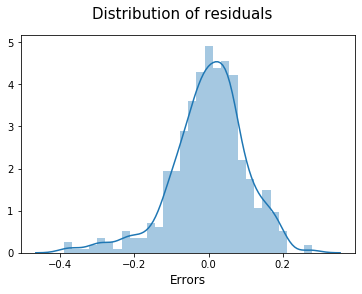

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Distribution of residuals', fontsize = 15) 
plt.xlabel('Errors', fontsize = 12) 

In [74]:
# Residual mean
(y_train-y_train_pred).mean()

-8.378374247109944e-16

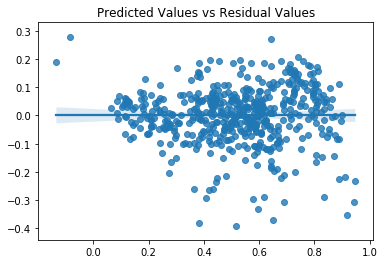

In [75]:
# Regression plot
plt.figure()
plt.title('Predicted Values vs Residual Values')
sns.regplot(y_train_pred,y_train-y_train_pred)
plt.show()

## Making Predictions

#### First we need to apply scaling

In [76]:
# Importing the library to perform min-max scaling
from sklearn.preprocessing import MinMaxScaler

# Creating an object with the column names which needs to be scaled
scale_temp = ['temp','hum','windspeed','cnt']

# Performing the scaling
scaler = MinMaxScaler()

df_test[scale_temp] = scaler.fit_transform(df_test[scale_temp])

Dividing test into X_test and y_test

In [77]:
# Creating X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [79]:
# Making predictions
y_test_pred = Final_Model.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

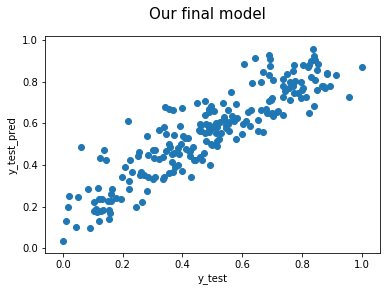

In [80]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Our final model', fontsize=15)    # Plot heading 
plt.xlabel('y_test', fontsize=10)                       # X-label
plt.ylabel('y_test_pred', fontsize=10)            # Y-label

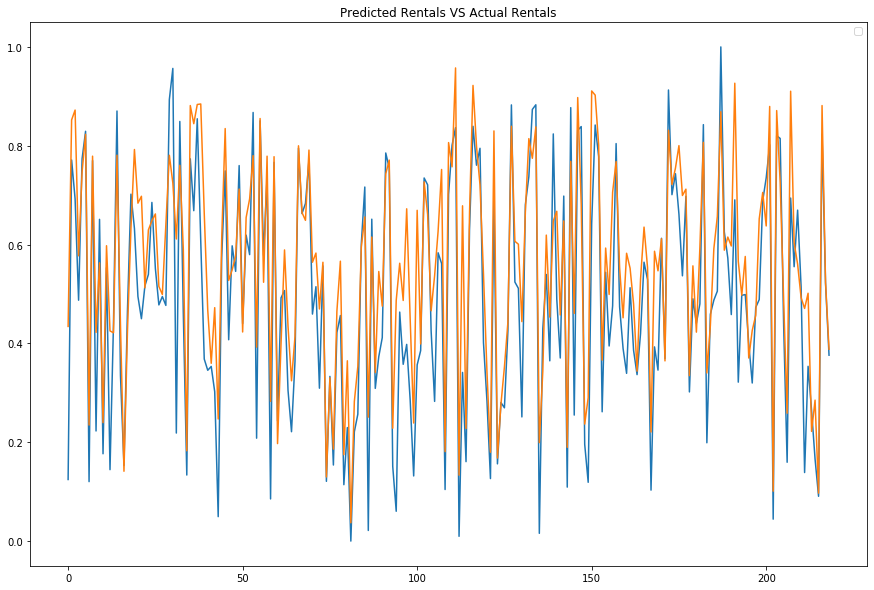

In [81]:
plt.figure(figsize=(15,10))
l1=plt.plot(range(len(y_test)),y_test)
l2 =plt.plot(range(len(y_test_pred)),y_test_pred)
plt.title("Predicted Rentals VS Actual Rentals")
plt.legend([l1,l2],['Actual', 'Predicted'])
plt.show()

## Model Stability

In [82]:
# r2_score
from sklearn.metrics import r2_score
print(' R-Squared for TEST',r2_score(y_test, y_test_pred))
print(' R-Squared for Train',r2_score(y_train, y_train_pred))

 R-Squared for TEST 0.7263140394805918
 R-Squared for Train 0.8006072203185731


In [84]:
# Our features that we have selected 
f

Index(['yr', 'temp', 'hum', 'windspeed', 'winter', 'July', 'Sept', 'Sat',
       'Light Snow Rain'],
      dtype='object')

We have analyzed the data with Reverse Feature selection in which 15 features were selected algorithmically. Removing the variables were done manually by looking at multicollinearity and p value

Final model achieved in Train data set is able to explain 80.4% of the variance in Train and 74% of variance in prod


cnt = 0.2421 + 0.2227*yr + 0.6845*temp - 0.2804*hum - 0.1190*windspeed + 0.1252*winter - 0.0846*July + 0.0669*Sept - 0.1823*Light Snow Rain +0.0358*Sat

where temp, windspeed and hum are normalized